## Results

Notebook to clean up, organize, analyze, and visualize results from Notebook 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('candidates.csv')
#print(df1.shape)
df2 = pd.read_csv('marginal.csv')
#print(df2.shape)
#print(df1.shape[0] - df2.shape[0]) # diff should be size of development set, since no marginal probabilities for those

In [3]:
result = pd.merge(df1, df2, on = 'id')
#print(result.shape)
#result.to_csv('result.csv', index=False)

In [4]:
result['virus'] = result['virus'].apply(lambda x: x.strip())
result['host'] = result['host'].apply(lambda x: x.strip())

In [5]:
# viruses - fix names
result.replace('West Nile [vV]irus|WEST NILE VIRUS', 'WNV', inplace=True, regex=True)
result.replace('West Nile', 'WNV', inplace=True)
result.replace('TBE virus', 'TBEV', inplace=True)
result.replace('tick  borne encephalitis virus', 'TBEV', inplace=True)
result.replace('tick  borne encephalitis', 'TBEV', inplace=True)
result.replace('Tick  Borne Encephalitis Virus', 'TBEV', inplace=True)
result.replace('TBE', 'TBEV', inplace=True)
result.replace('Usutu virus', 'USUV', inplace=True)
result.replace('Japanese encephalitis', 'JEV', inplace=True)
result.replace('Japanese encephalitis virus', 'JEV', inplace=True)
result.replace('Zika virus', 'ZIKV', inplace=True)
result.replace('louping ill virus', 'LIV', inplace=True)
result.replace('dengue|Dengue|DENV virus', 'DENV', inplace=True, regex=True)
result.replace('SLE virus', 'SLEV', inplace=True, regex=True)
# hosts
result.replace('Human|humans', 'human', inplace=True, regex=True)
result.replace('Monkey|monkeys', 'monkey', inplace=True, regex=True)
result.replace('mice|Mice', 'mouse', inplace=True, regex=True)
result.replace('pig|pigs|Pig|Pigs', 'swine', inplace=True, regex=True)
result.replace('Chicken|chickens', 'chicken', inplace=True, regex=True)
result.replace('Sheep', 'sheep', inplace=True, regex=True)

In [6]:
# filter by positively predicted candidates (probability at least 51%)
positive = result[result['probability_positive'] >= 0.51]
#print(positive.shape) # approx num of positive candidates

In [7]:
positive.sort_values(by = 'probability_positive').head()

,id,virus,host,probability_positive
4180,4611,den,Porphyrio porphyrio,0.511686
4182,4613,den,magpie,0.511928
4183,4614,den,T spinicollis,0.511936
4181,4612,den,Nycticorax caledonicus,0.511945
4179,4610,den,Dendrocygna eytoni,0.511947


In [8]:
#positive['virus'].value_counts()
#positive['host'].value_counts()

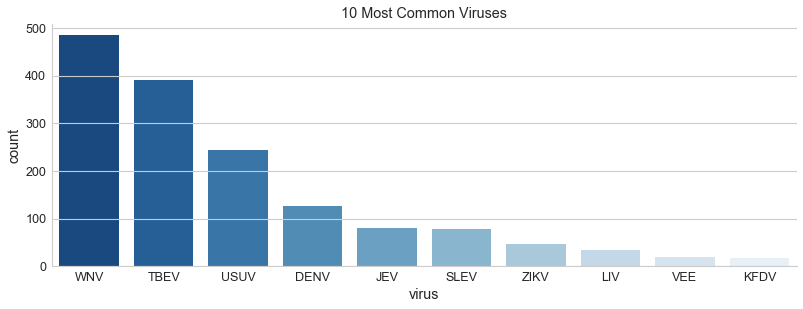

In [9]:
g = sns.catplot(x="virus", kind="count", data=positive, order=pd.value_counts(positive['virus']).iloc[:10].index, palette="Blues_r")
g.fig.set_size_inches(12,4)
axes = g.axes.flatten()
axes[0].set_title("10 Most Common Viruses")
plt.show()

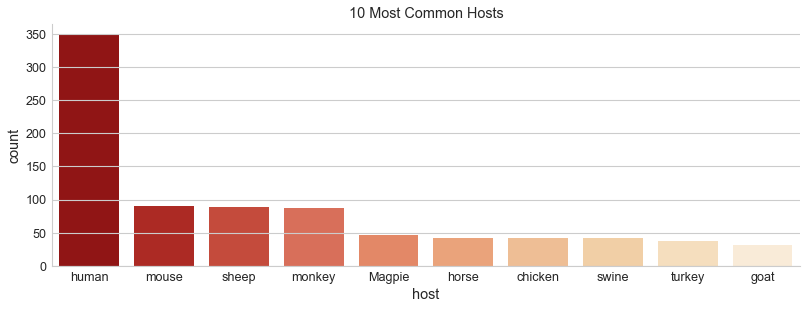

In [10]:
g = sns.catplot(x="host", kind="count", data=positive, order=pd.value_counts(positive['host']).iloc[:10].index, palette='OrRd_r')
g.fig.set_size_inches(12,4)
axes = g.axes.flatten()
axes[0].set_title("10 Most Common Hosts")
plt.show()

# Future data viz graphs to make:
- Network analysis graph (nodes = viruses connected by hosts in common)
- Correlations btwn viruses (depend on how many host sin common); pairplot; heatmap w virus on one axis and host on another axis
- Stacked bar plot of virus count (each bar divided by hosts names)
- Bar plot of negative relations


In [11]:
positive.head()

,id,virus,host,probability_positive
1,2,JEV,human,0.578963
2,3,TBEV,mouse,0.817809
7,8,WNV,chicken,0.645893
8,9,WNV,rabbit,0.645893
9,10,WNV,Columba livia,0.778484


In [14]:
column_edge = 'host'
column_ID = 'virus'

data_to_merge = positive[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [16]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [25]:
d.head(50)

,virus,virus_2,host
1,JEV,WNV,human
2,JEV,TBEV,human
3,JEV,SINV,human
6,JEV,RKI,human
7,JEV,ZIKV,human
9,JEV,SLEV,human
10,JEV,USUV,human
11,JEV,KFD,human
12,JEV,LAN,human
14,JEV,den,human


In [21]:
positive['virus'].iloc[0]

'JEV'

In [18]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

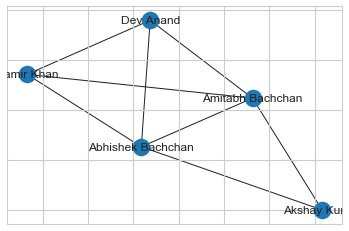

In [19]:
nx.draw_networkx(G_symmetric)

In [26]:
v_h = nx.Graph()
for num in range(68,168):
    v_h.add_edge(d['virus'].iloc[num], d['virus_2'].iloc[num])

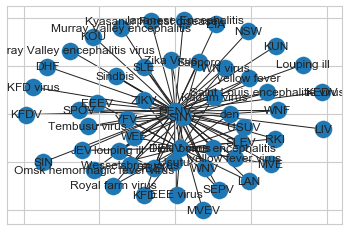

In [27]:
nx.draw_networkx(v_h)